In [134]:
import pathlib
path=str(pathlib.Path().resolve().parent)+"/imagenes/"

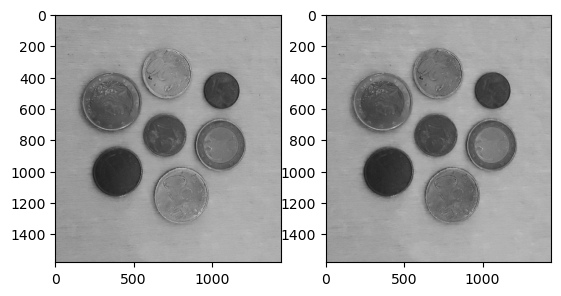

In [135]:
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread(path + "monedas.jpg")
fig,axs = plt.subplots(1,2)
axs[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2GRAY),cmap="gray")
axs[1].imshow(img[:,:,0],cmap="gray")
img1=img[:,:,0]

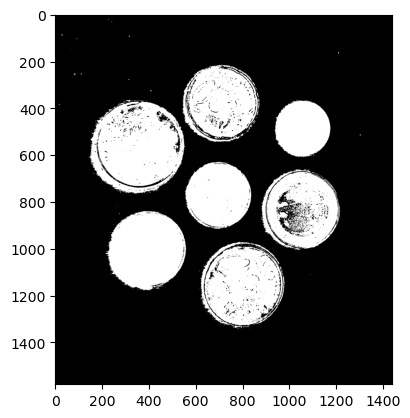

In [136]:
ret,th1 = cv.threshold(img1,127, 255,cv.THRESH_BINARY_INV)
plt.imshow(th1,cmap="gray")

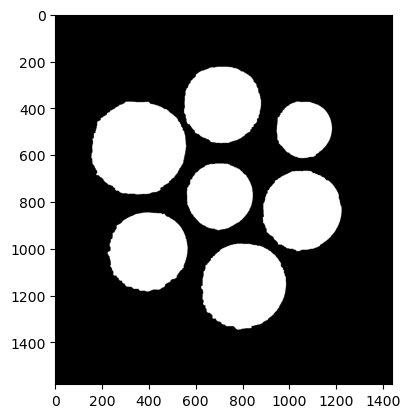

In [137]:

import numpy as np

kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (4,4))


img2 = cv.morphologyEx(th1, cv.MORPH_CLOSE, kernel, iterations=5)
img2 = cv.morphologyEx(img2, cv.MORPH_OPEN, kernel, iterations=2)
plt.imshow(img2,cmap="gray")

# **BORDE**

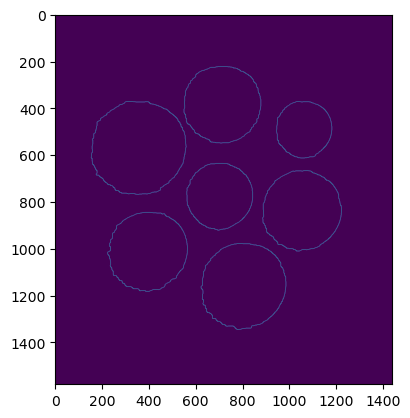

In [138]:
min=50
max=100
cn = cv.Canny(img2,min,max)
plt.imshow(cn)

# **CONTORNOS**

In [139]:
img_c = img.copy()
contornos,jerarquia = cv.findContours(cn,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
print(len(contornos))

7


Centro: X:803 Y:1158
Centro: X:395 Y:1011
Centro: X:1052 Y:838
Centro: X:701 Y:776
Centro: X:1061 Y:491
Centro: X:355 Y:570
Centro: X:713 Y:384


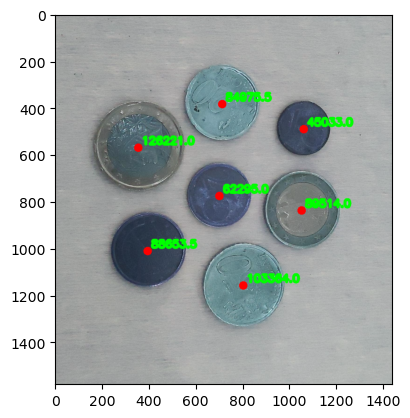

In [140]:
for contorno in contornos:
    M = cv.moments(contorno)
    if M['m00']:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
        print(f"Centro: X:{cx} Y:{cy}")

        cv.circle(img_c, (cx, cy), 5, (255, 0, 0), 25)
        cv.putText(img_c, str(cv.contourArea(contorno)), (cx+15,cy-15),  cv.FONT_HERSHEY_SIMPLEX, 1.5, (0,255,0),12)
plt.imshow(img_c)